In [2]:
#Evan-1103204160
#importing lib seaborn and pandas
import seaborn as sns
import pandas as pd
#calling Iris dataset
iris= sns.load_dataset('iris')
#dataframe
iris_df=pd.DataFrame(iris)
#print df informations
print(iris_df.head())
iris_df.info()
iris_df.describe()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#kolom unik spesies (target)
unique_species = iris_df['species'].unique()
print(unique_species)
#atribut column
atribut = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
#target column
target=iris_df['species']

['setosa' 'versicolor' 'virginica']


In [5]:
#species counts
species_counts=iris_df["species"].value_counts()
print(species_counts)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


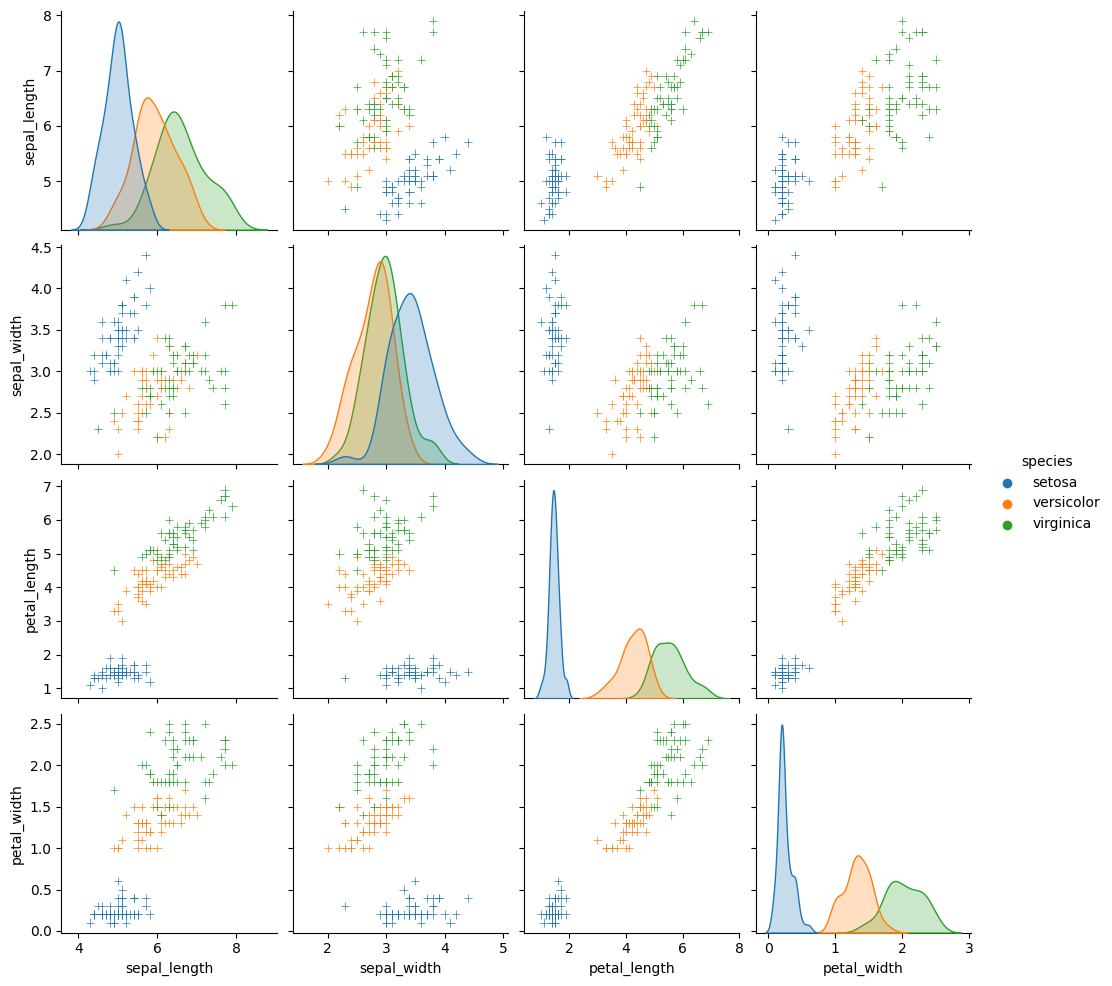

In [6]:
#data visualisation #1 #plot
#mpl library call
import matplotlib.pyplot as plt
#making the plot
g=sns.pairplot(iris_df,hue='species',markers='+')
plt.show()

In [7]:
#sklearn model lib
from sklearn.model_selection import train_test_split
#fitur and target var
X=iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y=iris_df['species']
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
#import library for decission tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
#desc tree model
decision_tree = DecisionTreeClassifier(random_state=42)
#melatih model
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
#predict
y_pred = decision_tree.predict(X_test)
#mengukur akurasi
accuracy=accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy)
# Mengonversi akurasi ke dalam bentuk persen
accuracy_percent = accuracy * 100
print("Accuracy: ",accuracy_percent)

accuracy:  1.0
Accuracy:  100.0


In [12]:
#import for graphviz
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

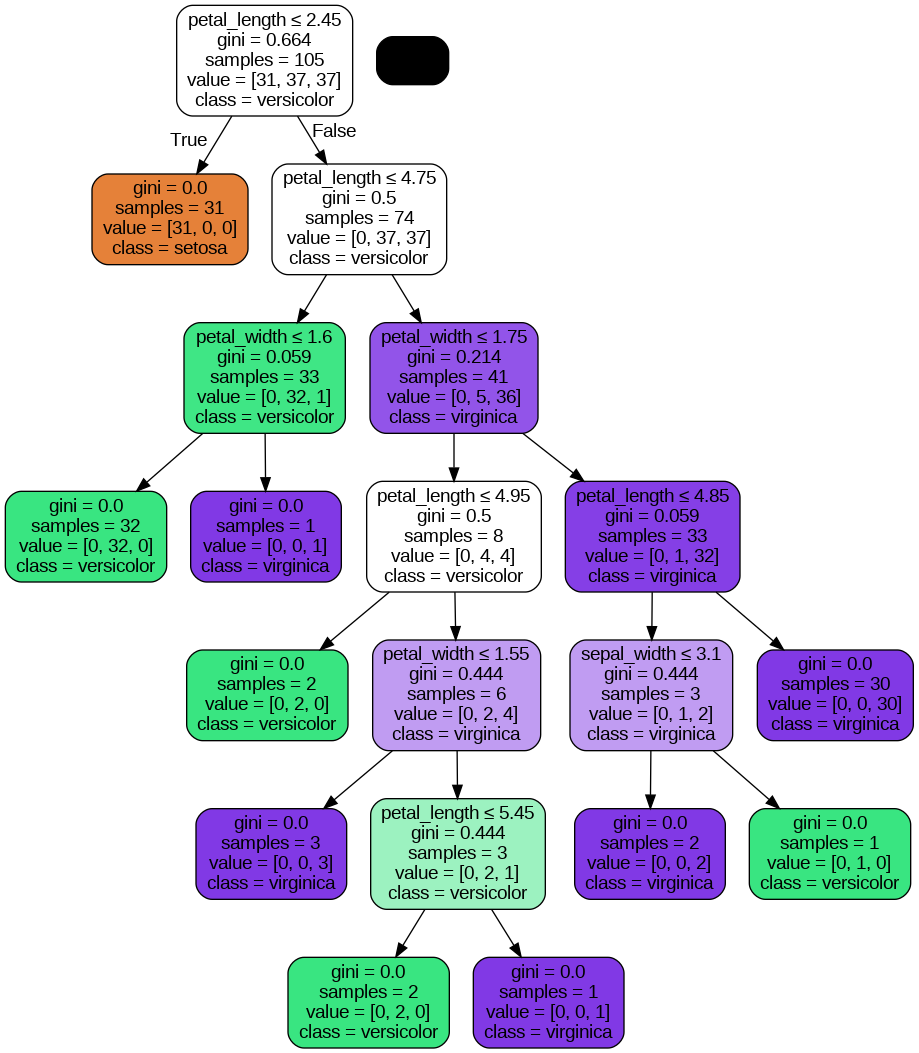

In [15]:
#Decision tree ke dot format
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)
#graph from dot data generation
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decisiontree.png")
Image(graph.create_png())

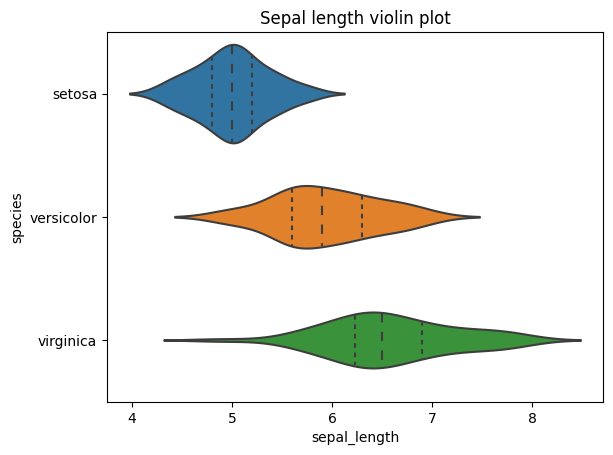

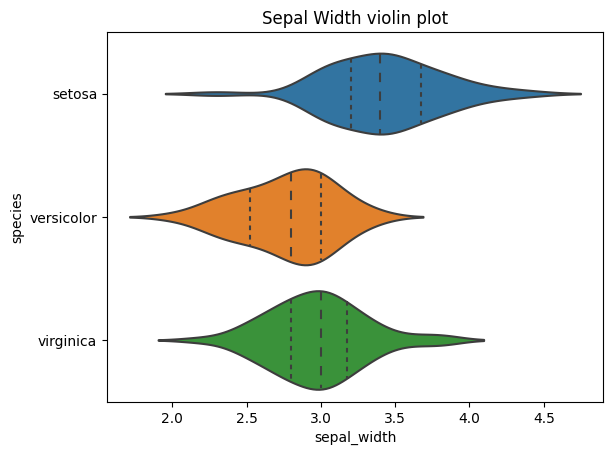

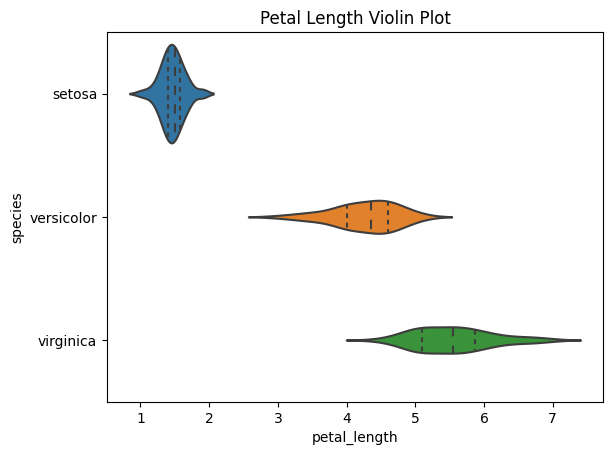

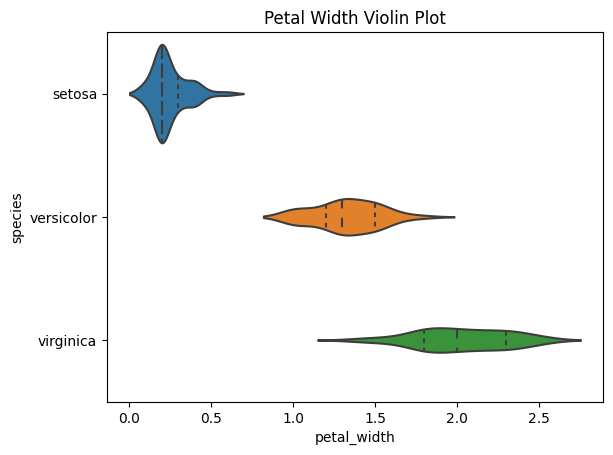

In [16]:
# violin plot for sepal length
g = sns.violinplot(y='species', x='sepal_length', data=iris_df, inner='quartile')
plt.title("Sepal length violin plot")
plt.show()

# violin plot for Sepal Width
g = sns.violinplot(y='species', x='sepal_width', data=iris_df, inner='quartile')
plt.title("Sepal Width violin plot")
plt.show()

#violin plot for Petal Length
g = sns.violinplot(y='species', x='petal_length', data=iris_df, inner='quartile')
plt.title("Petal Length Violin Plot")
plt.show()

# violin plot for Petal width
g = sns.violinplot(y='species', x='petal_width', data=iris_df, inner='quartile')
plt.title("Petal Width Violin Plot")
plt.show()

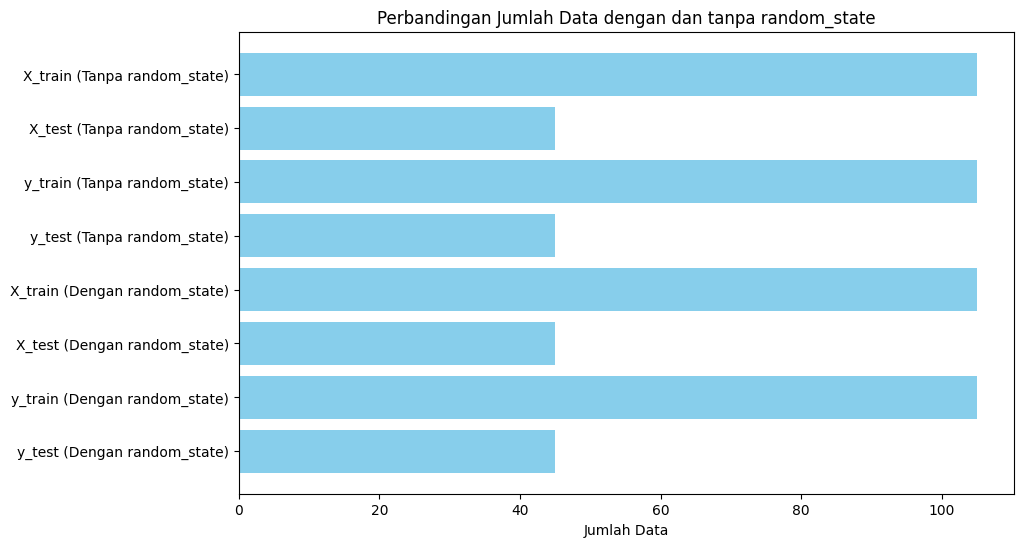

In [17]:
#splitting without random state
X_train_no_random, X_test_no_random, y_train_no_random, y_test_no_random = train_test_split(X, y, test_size=0.3)

# splitting with random state
X_train_with_random, X_test_with_random, y_train_with_random, y_test_with_random = train_test_split(X, y, test_size=0.3, random_state=42)

# DF Comparison
comparison_data = {
    "Atribut": ["X_train (Tanpa random_state)", "X_test (Tanpa random_state)", "y_train (Tanpa random_state)", "y_test (Tanpa random_state)",
                "X_train (Dengan random_state)", "X_test (Dengan random_state)", "y_train (Dengan random_state)", "y_test (Dengan random_state)"],
    "Jumlah Data": [len(X_train_no_random), len(X_test_no_random), len(y_train_no_random), len(y_test_no_random),
                    len(X_train_with_random), len(X_test_with_random), len(y_train_with_random), len(y_test_with_random)]
}
atribut = ["X_train (Tanpa random_state)", "X_test (Tanpa random_state)", "y_train (Tanpa random_state)", "y_test (Tanpa random_state)",
           "X_train (Dengan random_state)", "X_test (Dengan random_state)", "y_train (Dengan random_state)", "y_test (Dengan random_state)"]
jumlah_data = [105, 45, 105, 45, 105, 45, 105, 45]

#plot bar
plt.figure(figsize=(10, 6))
plt.barh(atribut, jumlah_data, color='skyblue')
plt.xlabel('Jumlah Data')
plt.title('Perbandingan Jumlah Data dengan dan tanpa random_state')
plt.gca().invert_yaxis()
plt.show()

comparison_df = pd.DataFrame(comparison_data)